# POLYNOMIAL REGRESSION IMPLEMENTATION WITH NEWTON SOLVER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class PolynomialRegression:
    '''
        Newton Method for Polynomial Regression
    '''
    CONVERGENCE_THRESHOLD = 1.5e-8

    def __init__(self, degree=1):
        self.degree = degree

    def predict(self, X):
        X = self._to_polinomial_features(X, self.degree)
        X = np.insert(np.array(X), 0, 1, axis=1)

        return X @ self.weights

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        X = self._to_polinomial_features(X, self.degree)

        # Add intercept as first column
        X = np.insert(X, 0, 1, axis=1)

        self.weights = self._solve_newton(X, y, np.zeros(X.shape[1]))

    def _to_polinomial_features(self, X, degree):
        if degree <= 1:
            return X
        else:
            X = np.array(X)
            iterator = 0
            poly_features = np.empty((len(X), X.shape[1] * degree))
            for i in range(X.shape[1]):
                for power in range(1, degree + 1):
                    poly_features[:, iterator] = X[:, i] ** power
                    iterator += 1

            return poly_features

    def _gradient(self, X, y, weights):
        '''Gradient vector from RSS'''
        m = len(X)
        return -2 * X.T @ (y - X @ weights)

    def _hessian(self, X):
        '''Hessian matrix from RSS'''
        m = len(X)
        return 2 * X.T @ X

    def _calculate_MSE(self, X, y, theta):
        '''Mean Squared Error'''
        return np.mean((y - X @ theta) ** 2)

    def _solve_newton(self, X, y, weights):
        w = weights
        cost_residual = float("inf")

        while (cost_residual > PolynomialRegression.CONVERGENCE_THRESHOLD):
            prev_cost = self._calculate_MSE(X, y, w)
            w = w - np.linalg.inv(self._hessian(X)) @ self._gradient(X, y, w)
            new_cost = self._calculate_MSE(X, y, w)

            cost_residual = abs(prev_cost - new_cost)

        return w
   

# Test implementation and compare with SKLearn

In [3]:
from sklearn.model_selection import train_test_split

### Load Dataset

In [4]:
sales = pd.read_csv("../data/house_data.csv")
sales = sales.sort_values(['sqft_living','price'])

In [5]:
sales = sales.sample(frac=0.20, random_state=12) # Use only 20% of dataset
train = sales.sample(frac=0.50, random_state=12) 
test = sales.drop(train.index)

In [6]:
train_sorted = train.sort_values(['sqft_living','price'])
X_train = train_sorted[["sqft_living"]]
y_train = train_sorted["price"]

In [7]:
test_sorted = test.sort_values(['sqft_living','price'])
X_test = test_sorted[["sqft_living"]]
y_test = test_sorted["price"]

In [8]:
polynomial_regression_custom_4_degree = PolynomialRegression(degree=4)
polynomial_regression_custom_4_degree.fit(X_train, y_train)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [10]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly_train = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_poly_pred = model.predict(x_poly_train)

### Compare plots of Custom and SKLearn Polynomial Regreession

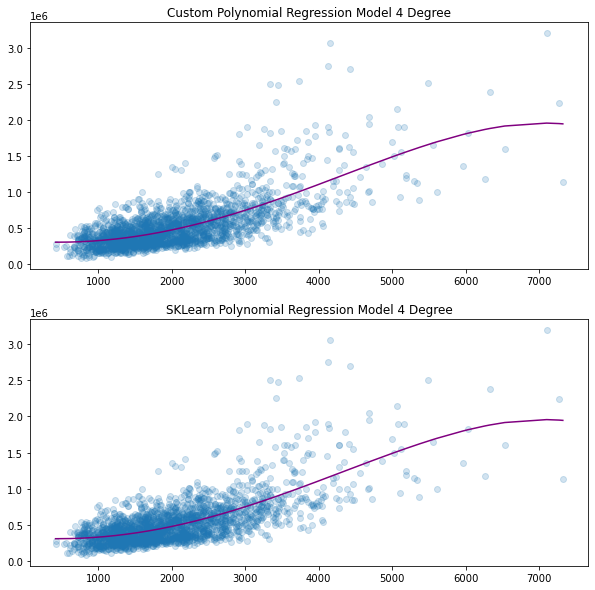

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.title("Custom Polynomial Regression Model 4 Degree")
plt.scatter(X_train["sqft_living"], y_train, alpha=0.2)
plt.plot(X_train["sqft_living"], polynomial_regression_custom_4_degree.predict(X_train), '-', color="purple")

plt.subplot(2, 1, 2)
plt.title("SKLearn Polynomial Regression Model 4 Degree")
plt.scatter(x_poly_train[:,1], y_train, alpha=0.2)
plt.plot(x_poly_train[:,1], model.predict(x_poly_train), '-', color="purple")

### Evaluate MSE

In [12]:
from sklearn.metrics import mean_squared_error
polynomial_reg_MSE_custom = mean_squared_error(y_test, polynomial_regression_custom_4_degree.predict(X_test))
polynomial_reg_MSE_SKLear = mean_squared_error(y_test, model.predict(x_poly_test))

In [13]:
print("Custom model MSE:", polynomial_reg_MSE_custom)
print("SKLearn model MSE:", polynomial_reg_MSE_SKLear)

Custom model MSE: 95132110439.24945
SKLearn model MSE: 95132213130.14517
